In [32]:
"""Read a sample FluxNet dataset and generate plots."""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams.update({'mathtext.default': 'regular'})  # sans-serif math

In [33]:
def timestamp_parser(s):
    """A timestamp parser. Highly efficient with pandas C engine."""
    return np.datetime64('%s-%s-%sT%s:%s' %
                         (s[0:4], s[4:6], s[6:8],
                          s[8:10], s[10:12]))

# columns are separated by comma
# if comment line exists at the beginning, it usually starts with a `#`
# invalid values are represented as -9999 since not all programs support `NaN`
# parse timestamps directly upon reading the data, no conversion needed

# modify datafile names!!!
# BR-Sa1: 'FLX_BR-Sa1_FLUXNET2015_SUBSET_HR_2002-2011_1-3.csv'
# NL-Loo: 'FLX_NL-Loo_FLUXNET2015_SUBSET_HH_1996-2013_1-3.csv'
# US-MMS: 'FLX_US-MMS_FLUXNET2015_SUBSET_HR_1999-2014_1-3.csv'
# US-Ton: 'FLX_US-Ton_FLUXNET2015_SUBSET_HH_2001-2014_1-3.csv'

df_flux = pd.read_csv('fluxdata.csv', sep=',', engine='c', 
                      parse_dates=[0, 1], date_parser=timestamp_parser,
                      na_values=-9999, comment='#')


In [34]:
# check column names
# refer to the table at 
# http://fluxnet.fluxdata.org/data/fluxnet2015-dataset/subset-data-product/
print(df_flux.columns.values)

['TIMESTAMP_START' 'TIMESTAMP_END' 'TA_F' 'TA_F_QC' 'SW_IN_POT' 'SW_IN_F'
 'SW_IN_F_QC' 'LW_IN_F' 'LW_IN_F_QC' 'VPD_F' 'VPD_F_QC' 'PA_F' 'PA_F_QC'
 'P_F' 'P_F_QC' 'WS_F' 'WS_F_QC' 'WD' 'USTAR' 'RH' 'NETRAD' 'PPFD_IN'
 'PPFD_OUT' 'CO2_F_MDS' 'CO2_F_MDS_QC' 'TS_F_MDS_1' 'TS_F_MDS_1_QC'
 'SWC_F_MDS_1' 'SWC_F_MDS_1_QC' 'G_F_MDS' 'G_F_MDS_QC' 'LE_F_MDS'
 'LE_F_MDS_QC' 'LE_CORR' 'LE_CORR_25' 'LE_CORR_75' 'LE_RANDUNC' 'H_F_MDS'
 'H_F_MDS_QC' 'H_CORR' 'H_CORR_25' 'H_CORR_75' 'H_RANDUNC' 'NIGHT'
 'NEE_VUT_REF' 'NEE_VUT_REF_QC' 'NEE_VUT_REF_RANDUNC' 'NEE_VUT_25'
 'NEE_VUT_50' 'NEE_VUT_75' 'NEE_VUT_25_QC' 'NEE_VUT_50_QC' 'NEE_VUT_75_QC'
 'RECO_NT_VUT_REF' 'RECO_NT_VUT_25' 'RECO_NT_VUT_50' 'RECO_NT_VUT_75'
 'GPP_NT_VUT_REF' 'GPP_NT_VUT_25' 'GPP_NT_VUT_50' 'GPP_NT_VUT_75'
 'RECO_DT_VUT_REF' 'RECO_DT_VUT_25' 'RECO_DT_VUT_50' 'RECO_DT_VUT_75'
 'GPP_DT_VUT_REF' 'GPP_DT_VUT_25' 'GPP_DT_VUT_50' 'GPP_DT_VUT_75' 'RECO_SR'
 'RECO_SR_N']


In [37]:
# subset the dataframe as you like
# modify `plot_time_start` and `plot_time_end` to select the plotted period
# must follow the format 'yyyy-mm-dd{T}hh:mm'
plot_time_start = np.datetime64('2005-01-01T00:00')
plot_time_end = np.datetime64('2006-01-01T00:00')
df_flux_subset = df_flux.loc[
    (df_flux['TIMESTAMP_START'] >= plot_time_start) &
    (df_flux['TIMESTAMP_START'] < plot_time_end), :]

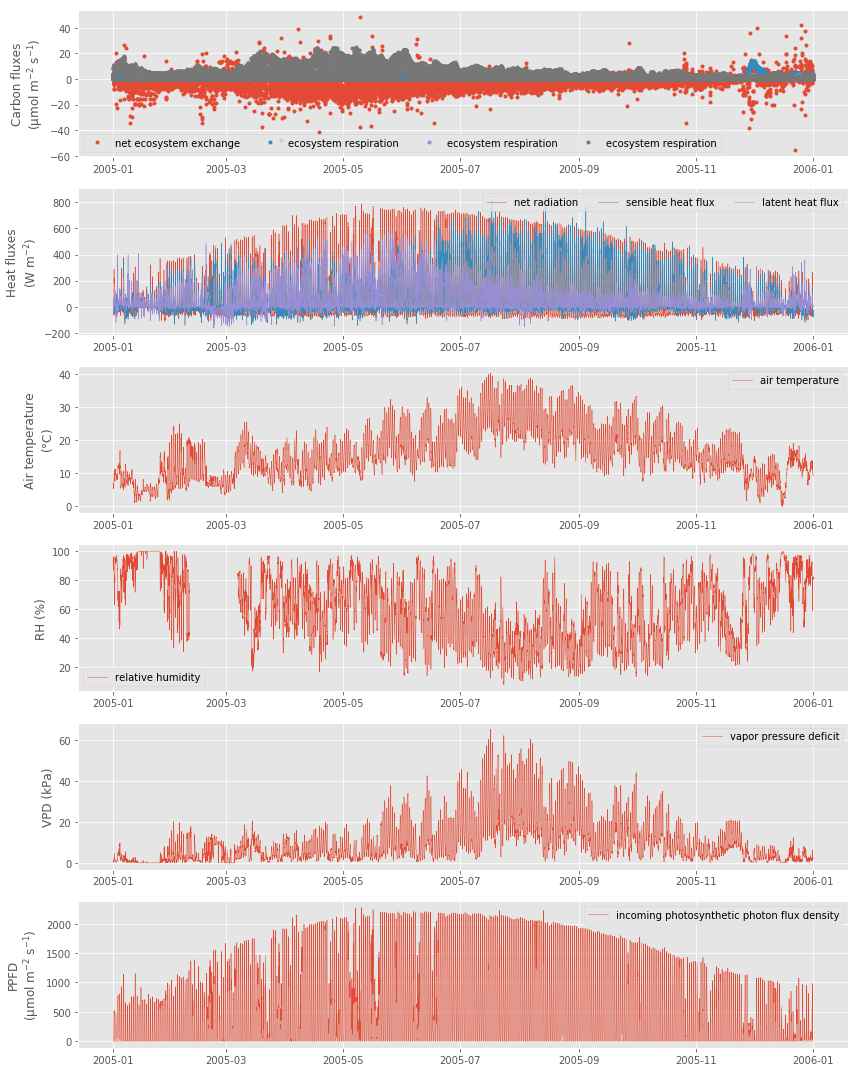

In [40]:
fig, axes = plt.subplots(6, 1, figsize=(12, 15))
axes[0].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['NEE_VUT_REF'],
             '.', label='net ecosystem exchange')
axes[0].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['RECO_NT_VUT_REF'],
             '.', label='ecosystem respiration')
axes[0].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['RECO_DT_VUT_REF'],
             '.', label='ecosystem respiration')
axes[0].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['GPP_DT_VUT_REF'],
             '.', label='ecosystem respiration')

axes[1].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['NETRAD'],
             '-', lw=0.5, label='net radiation')
axes[1].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['H_CORR'],
             '-', lw=0.5, label='sensible heat flux')
axes[1].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['LE_CORR'],
             '-', lw=0.5, label='latent heat flux')

# no valid soil heat flux data
# axes[1].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['G'],
#              '-', lw=0.5, label='soil heat flux')

axes[2].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['TA_F'],
             '-', lw=0.5, label='air temperature')


axes[3].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['RH'],
             '-', lw=0.5, label='relative humidity')

axes[4].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['VPD_F'],
             '-', lw=0.5, label='vapor pressure deficit')

# no valid soil measurements
# axes[3].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['TS_1'],
#              '-', lw=0.5, label='soil temperature #1')
# axes[3].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['TS_1'],
#              '-', lw=0.5, label='soil temperature #2')
# axes[3].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['SWC_1'],
#              '-', lw=0.5, label='soil moisture #1')
# axes[3].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['SWC_2'],
#              '-', lw=0.5, label='soil moisture #2')

axes[5].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['PPFD_IN'],
             '-', lw=0.5, label='incoming photosynthetic photon flux density')

# axes[5].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['PPFD_OUT'],
#              '-', lw=0.5, label='outgoing PPFD')
# axes[5].plot(df_flux_subset['TIMESTAMP_START'], df_flux_subset['PPFD_DIF'],
#              '-', lw=0.5, label='diffuse incoming PPFD')

for i in range(6):
    axes[i].legend(loc='best', frameon=True, fontsize=10, ncol=4)

axes[0].set_ylabel('Carbon fluxes\n($\mu$mol m$^{-2}$ s$^{-1}$)')
axes[1].set_ylabel('Heat fluxes\n(W m$^{-2}$)')
axes[2].set_ylabel('Air temperature\n($\degree$C)')
axes[3].set_ylabel('RH (%)')
axes[4].set_ylabel('VPD (kPa)')
axes[5].set_ylabel('PPFD\n($\mu$mol m$^{-2}$ s$^{-1}$)')

fig.tight_layout()

fig.savefig('fluxdata_timeseries.png', dpi=300)